In [84]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

import pickle
import dill

import slab_tracker_utils as slab
import splits_and_merges as snm
import slab_cross_section_utils as sxs

%matplotlib inline

#######################################################
# Define Input files for Muller 2016 AREPS model
#######################################################


#'''

MODELDIR = '/Applications/GPlates-2.2.0/SampleData/FeatureCollections'
RotFile_List = ['%s/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot' % MODELDIR]
GPML_List = ['%s/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz' % MODELDIR,\
             '%s/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz' % MODELDIR]
#'''
#'''
#MODELDIR = '/Users/Simon/Desktop/Global_Model_WD_Internal_Release_2016_v3_RM010419/'
#RotFile_List = glob.glob('%s/*.rot' % MODELDIR)
#GPML_List = glob.glob('%s/*.gpml' % MODELDIR)
#'''


# OPTIONAL
# specify the convention for agegrids
# assumes that the file name has 1 number within it that specifies the age in Myr
# the list object below must contain 2 strings, which specify the bit before and after this number
#agegrid_filename = ['/Users/Simon/Data/AgeGrids/Agegrids_30m_20151002_2015_v1_r756/agegrid_30m_','.grd']
grid_filename = ['/Users/Andrew/Documents/PhD/Scripts/Python_Scripts/pyGPlates_examples/Merdith_2019_Frontiers/output/rasters/PMSR_perid_','_Ma.grd']
# If you do not have age grids, use the next line instead:
#agegrid_filename = None

#####################################
rotation_model = pygplates.RotationModel(RotFile_List)
topology_features = pygplates.FeatureCollection()
for file in GPML_List:
    topology_feature = pygplates.FeatureCollection(file)
    topology_features.add(topology_feature)
#'''

pygplates.__version__


'2.1.0.22'

### Explanation
An example of how to define parameters.

Suppose you want to look at the material subducted between 20 Ma and 10 Ma, then you would specify the start_time as 20 and the end_time as 10. 

This will produce a plot which is a snapshot at 10 Ma (the end_time), with a series of lines that show subducted slabs traced from surface trench positions between 20 and 10 Ma (and with a spacing determined by 'time_step', and with a colour indicating the depth. 

Lines are drawn between sets of points which were subducted along the same trench at the same time - note that, ven though they look like contours, they are not actually contours in terms of having the same depth, or the same age of the subducting lithosphere, rather they are 'iso-subduction-time-chrons'

The depth and position of each point is a function of the slab dip.


[ the parameter 'warped_time_interval' is not actually used in this implementation ]



time 5.00 Ma


Unable to find the overriding plate of the subducting shared sub-segment "Alpine subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "Alpine subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "Ligurian subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NewBritian TR-MG-5-22-07" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
653
Unable to find the overriding and subducting pl

time 4.00 Ma


Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 4.0Ma
    there are not exactly 2 t

time 3.00 Ma


Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 3.0Ma
    there are not exactly 2 topologies sharing the 

time 2.00 Ma


Unable to find the overriding plate of the subducting shared sub-segment "" at 2.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Alpine subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "Alpine subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "Ligurian subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Marianas Trench-NUVEL" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the overriding and subducting plates of the subducting 

time 1.00 Ma


Unable to find the overriding and subducting plates of the subducting shared sub-segment "Marianas Trench-NUVEL" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segme

time 0.00 Ma


Unable to find the overriding and subducting plates of the subducting shared sub-segment "" at 0.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding plate of the subducting shared sub-segment "Alpine subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "Alpine subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "Ligurian subduction clean"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 0.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subdu

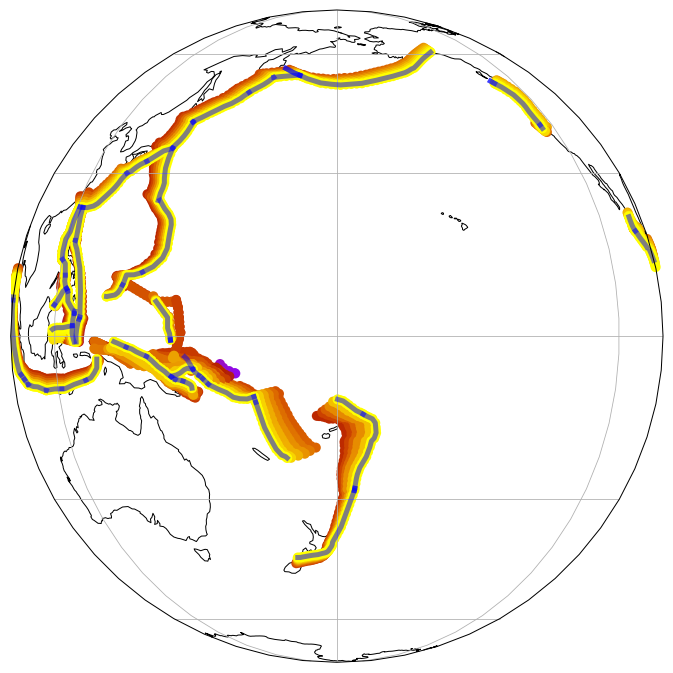

In [86]:
#############################
# INPUT PARAMETERS
# 
start_time = 5.
end_time = 0.
time_step = 1.0
dip_angle_degrees = 45.0
line_tessellation_distance = np.radians(1.0)
handle_splits = False
# Try to use small circle path for stage rotation to rotate along velocity dip.
# Ie, distance to stage rotation pole matches distance to original stage pole.
#use_small_circle_path = False

output_filename = 'subduction_3d_geometries_time_%0.2fMa_dip_%0.2fdeg.p' % (end_time,dip_angle_degrees)


#############################

#setup cartopy parameters
data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

#usually i use viridis, but the scientific colour maps of Crameri (2018) are nice, if you do use them you might
#have to change the cm.set_bad to be the appropriate colour (atm it is set to the '0' values of viridis)
cm = plt.get_cmap('viridis')#SCM5.tokyo
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,12),subplot_kw={'projection': ccrs.Orthographic(180)})


# array into which results will be stored
output_data = []

dip_angle_radians = np.radians(dip_angle_degrees)

time_list = np.arange(start_time,end_time-time_step,-time_step)

if handle_splits:
    plate_disappearance_time_lut = snm.get_plate_disappearance_time_lut(topology_features,
                                                                        rotation_model,
                                                                        time_list,
                                                                        verbose=True)

    print plate_disappearance_time_lut

# loop over a series of times at which we want to extract trench iso-sub-chrons
for time in time_list:
    
    print 'time %0.2f Ma' % time
    
    # call function to get subduction boundary segments
    subduction_boundary_sections = slab.getSubductionBoundarySections(topology_features,
                                                                      rotation_model,
                                                                      time)
    
    # Set up an age grid interpolator for this time, to be used
    # for each tessellated line segment
    if grid_filename is not None:
        grdfile = '%s%d%s' % (grid_filename[0],time,grid_filename[1])
        lut = slab.make_age_interpolator(grdfile)

    #print subduction_boundary_sections
    
    # Loop over each segment
    for segment_index,subduction_segment in enumerate(subduction_boundary_sections):

        # find the overrding plate id (and only continue if we find it)
        overriding_and_subducting_plates = slab.find_overriding_and_subducting_plates(subduction_segment,time)
                
        if not overriding_and_subducting_plates:
            continue
        overriding_plate, subducting_plate, subduction_polarity = overriding_and_subducting_plates

        overriding_plate_id = overriding_plate.get_resolved_feature().get_reconstruction_plate_id()
        subducting_plate_id = subducting_plate.get_resolved_feature().get_reconstruction_plate_id()
        
        #if (opid!=224 or cpid!=909):
        #if (subducting_plate_id!=911 and subducting_plate_id!=909):
        #if subducting_plate_id<900:
        #    continue
        
        subducting_plate_disappearance_time = -1.
        if handle_splits:
            for plate_disappearance in plate_disappearance_time_lut:
                if plate_disappearance[0]==subducting_plate_id:
                    subducting_plate_disappearance_time = plate_disappearance[1]
        
        tessellated_line = subduction_segment.get_resolved_geometry().to_tessellated(line_tessellation_distance)

        #print len(tessellated_line.get_points())
        
        if grid_filename is not None:
            x = tessellated_line.to_lat_lon_array()[:,1]
            y = tessellated_line.to_lat_lon_array()[:,0]
            subduction_ages = lut.ev(np.radians(y+90.),np.radians(x+180.))
        else:
            # if no age grids, just fill the ages with zero
            subduction_ages = [0. for point in tessellated_line.to_lat_lon_array()[:,1]]
              
        # CALL THE MAIN WARPING FUNCTION
        (points, 
         point_depths, 
         polyline) = slab.warp_subduction_segment(tessellated_line,
                                                  rotation_model,
                                                  subducting_plate_id,
                                                  overriding_plate_id,
                                                  subduction_polarity,
                                                  time,
                                                  end_time,
                                                  time_step,
                                                  dip_angle_radians,
                                                  subducting_plate_disappearance_time)
        
 
        # add points for this segment to the plot

        ax.scatter(polyline.to_lat_lon_array()[:,1],
                   polyline.to_lat_lon_array()[:,0],
                   c=np.array(point_depths),s=100,
                   edgecolors='',vmin=0,vmax=660,zorder=2,cmap=plt.cm.gnuplot_r,
                   transform=data_crs)
        ax.plot(polyline.to_lat_lon_array()[:,1],polyline.to_lat_lon_array()[:,0],
                 '-r',markersize=12,zorder=1, transform=data_crs)
        
        output_data.append([time,polyline,point_depths,subduction_ages])


# write out the features
#output_features = pygplates.FeatureCollection(point_features)

#output_features.write('SlabWindowPoints.gpmlz')
for szg in subduction_boundary_sections:
        tmpp = szg.get_resolved_geometry().to_lat_lon_array()
        ax.plot(tmpp[:,1],tmpp[:,0],'b',linewidth=5,alpha=0.5, transform=data_crs)
        #ax.scatter(tmpp[:,1],tmpp[:,0],color='b',s=10,alpha=0.1,transform=data_crs,zorder=2)

#ax.colorbar()

# Central America
#plt.xlim(-95,-70)
#plt.ylim(0,20)


ax.set_aspect('equal')
ax.set_global()
gl = ax.gridlines()
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
ax.coastlines()
fig.show()


### write results to file
slab.write_subducted_slabs_to_xyz(output_filename,output_data)



In [69]:
#define line for cross section
cross_section_points = []
cross_section_points.append((-25,-75))
cross_section_points.append((-25,-65))
cross_section_line = pygplates.PolylineOnSphere(cross_section_points)
cross_section_line = cross_section_line.to_tessellated(np.radians(0.1))

In [70]:
#get the iso-subchrons that intersect the cross section line

intersecting_lines = []
for ind, polyline in enumerate(output_data):
    
    #get min distance between 'iso-sub-chron' and our cross section
    min_distance_to_feature = pygplates.GeometryOnSphere.distance(polyline[1],cross_section_line)
    #if min distance is 0, then they intersect and we want the rest of the data
    if min_distance_to_feature == 0:
        intersecting_lines.append(polyline)

In [71]:
#now that we have our intersecting lines, we can find the containing segment of the line, in order
#to access the correct points (and then the correct depths, variables etc.)

intersecting_points = []
interpolated_variables = []
interpolated_depths = []

for ind, line in enumerate(intersecting_lines):
    
    #for clarity we will enunciate each iso-subchron
    age_of_subdcution = line[0]
    iso_subchron = line[1]
    depth = line[2]
    variable_data = line[3]
    
    #get intersect points, and starting indices of the segments that contain intersect points of our two lines
    #(cross section line, and iso-subchron)
    closest_point_data = \
    pygplates.GeometryOnSphere.distance(iso_subchron, cross_section_line, 
                                        return_closest_positions=True,
                                        return_closest_indices=True)

    #for clarity we will enunciate the closest point data
    tmp_distance = closest_point_data[0]
    #NB these next two should be the same
    tmp_sub_isochron_intercept = closest_point_data[1]
    tmp_cross_section_intercept = closest_point_data[2]
    #the indices refer to the start of the containing segment
    tmp_sub_isochron_segment_index = closest_point_data[3]
    tmp_cross_section_segment_index = closest_point_data[4]

    #set depths and variable indices
    variables = variable_data[tmp_sub_isochron_segment_index:tmp_sub_isochron_segment_index+2]
    depths = depth[tmp_sub_isochron_segment_index:tmp_sub_isochron_segment_index+2]
    
    interpolated_variable = sxs.get_intercept_values(tmp_sub_isochron_intercept, iso_subchron, variables)
    interpolated_variables.append(interpolated_variable)
    
    #NB (check)
    #because we are plotting depths and explicit distances along, we inherently correct for true/
    #apparent dip
    interpolated_depth = sxs.get_intercept_values(tmp_sub_isochron_intercept, iso_subchron, depths)
    interpolated_depths.append(interpolated_depth)
    
    tmp_values = age_of_subdcution, \
                 iso_subchron[tmp_sub_isochron_segment_index], \
                 depth[tmp_sub_isochron_segment_index], \
                 variable_data[tmp_sub_isochron_segment_index]
    
    intersecting_points.append(tmp_values)  

#reverse intersecting points so we're starting from the subduction zone
intersecting_points_reversed = intersecting_points[::-1]

In [72]:
#calculate distance as going across cross section
distances = []
cum_distances = []
for ind, i in enumerate(intersecting_points_reversed):
    if ind == 0:
        distance = 0
    else:
        distance = pygplates.GeometryOnSphere.distance(i[1], intersecting_points_reversed[ind-1][1])
        
    #to convert from radians to km we have to multiply by radius,
    #but as we are at depth, the radius is slightly different
    radius = pygplates.Earth.mean_radius_in_kms - interpolated_depths[::-1][ind]
    distances.append(distance*radius)
    cum_distances.append(np.sum(distances))
    

Text(0,0.5,'Depth (km)')

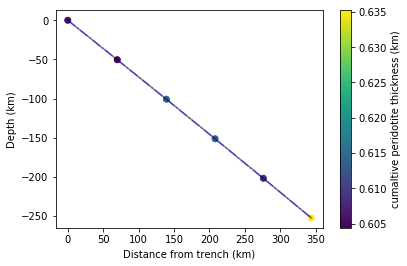

In [73]:
plt.scatter(np.asarray(cum_distances),
            np.asarray(interpolated_depths[::-1]) *-1,
           c=np.asarray(interpolated_variables))
plt.plot(np.asarray(cum_distances),
         np.asarray(interpolated_depths[::-1]) *-1, alpha=0.5, c='k')
plt.plot(np.asarray(cum_distances),
         np.asarray([i[2]*-1 for i in intersecting_points_reversed]), alpha=0.5, c='b', ls='-.')
plt.colorbar(label='cumaltive peridotite thickness (km)')
plt.xlabel('Distance from trench (km)')
plt.ylabel('Depth (km)')

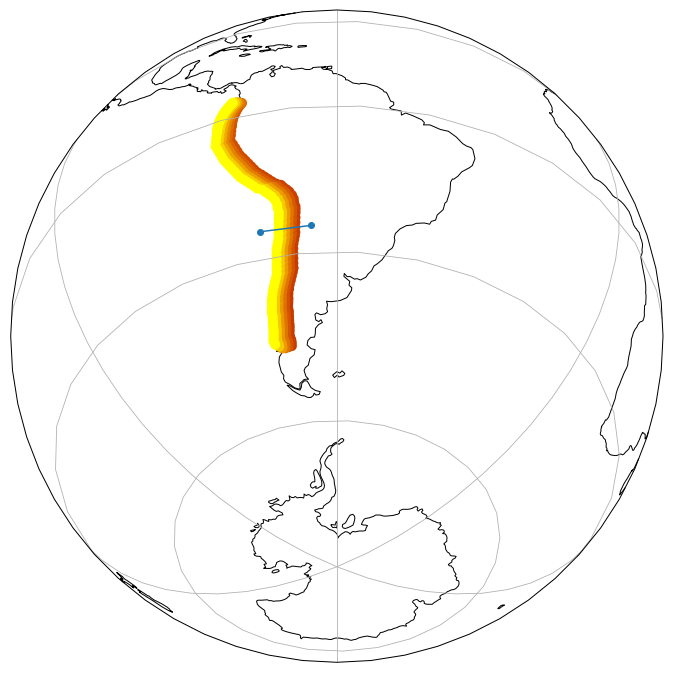

In [80]:
#setup cartopy parameters
data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

#usually i use viridis, but the scientific colour maps of Crameri (2018) are nice, if you do use them you might
#have to change the cm.set_bad to be the appropriate colour (atm it is set to the '0' values of viridis)
cm = plt.get_cmap('viridis')#SCM5.tokyo
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,12),
                       subplot_kw={'projection': ccrs.Orthographic(central_longitude=-60, central_latitude=-45)})
ax.set_global()
for i in intersecting_lines:
    polyline = i[1]
    depths = i[2]
    ax.scatter(polyline.to_lat_lon_array()[:,1],
           polyline.to_lat_lon_array()[:,0],
           c=np.array(depths),s=100,
           edgecolors='',vmin=0,vmax=660,zorder=2,cmap=plt.cm.gnuplot_r,
           transform=data_crs)
    ax.plot(polyline.to_lat_lon_array()[:,1],polyline.to_lat_lon_array()[:,0],
         '-r',markersize=12,zorder=1, transform=data_crs)
    
ax.scatter([cross_section_points[0][1], cross_section_points[1][1]],
           [cross_section_points[0][0], cross_section_points[1][0]], transform=data_crs)
ax.plot([cross_section_points[0][1], cross_section_points[1][1]],
           [cross_section_points[0][0], cross_section_points[1][0]], transform=data_crs)

gl = ax.gridlines()
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
ax.coastlines()